Make Jupyter cells as wide as possible

In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Import Python modules

In [40]:
import sys
import pandas as pd
import os
import platform
import matplotlib.pyplot as plt
print(platform.python_version())

3.6.4


# Define directory 
Set the directory to read motion files from.<br>
This directory should contain a set of sub-directories where the name matches the motion label.<br>
Each sub-directory contains a set of comma-separated (.csv) files each containing a single captured motion.

In [41]:
modelName = 'demoMotions' #to be used for exporting graphs and the trained ML model
rootDir = 'C:/Users/user/Dropbox/ShareIrene/ScienceFair/Experiments/DataFiles'
closeMotions = '20180303_2333'
distinctMotions = '20180217_2314'
demoMotions = '20190308_2131'

dataName = demoMotions 
dataRootDir = os.path.join(rootDir, dataName)

# Process csv file functions

The main function 'read_csv_files' loops through the sub-directories of the root and reads the .csv files.<br>
It calls the functions 'add_csv_df' and 'prepare_csv_df' to convert the motion data into a single DataFrame that can be processed by the SKLearn toolkit.

### read_csv_files function
This procedure starts from a root directory and loops over each sub-directory.<br>
Each sub-directory represents one class of motions. The directory name is the label for this motion.<br>
Each sub-directory contains a set of .csv files. Each .csv file is one captured motion.<br>
It returns a DataFrame where each motion is one row.

In [42]:
# motions_dict = {}
def read_csv_files(rootDir):
    df_list = []
    for dirName, subdirList, fileList in os.walk(rootDir):
        if dirName == rootDir:
            motionName = ''
        else:
            head, motionName = os.path.split(dirName) #split removes the directory separator, so we don't need to do this by replacing '\' or '/'
        if len(motionName) > 0:
#             print('Motion: %s' % motionName)
            for fname in fileList:
                filename, file_extension = os.path.splitext(fname)
                #Only consider csv files
                if file_extension.lower() == '.csv':   
                    csv_file = os.path.join(dirName, fname)
                    fileSize = os.path.getsize(csv_file)
                    dataName = fname.replace('.CSV', '')
#                     print('\t%s, size = %i, data = %s' % (fname, fileSize, dataName))
                    if (fileSize > 0):
                        df = pd.read_csv(csv_file)
                        if len(df.index) >= 48:
                            df = df.head(48)
                            if not df.isnull().values.any():
                                add_csv_df(df_list, df, dataName, motionName)
                            else:
                                print('Found null values')
                        else :
                            print('Less than 49 samples: ' + fname)
    all_df = pd.concat(df_list)
    all_df.columns.names = ['sample','qt']
    if all_df.isnull().values.any():
        print ("NULL")
    return all_df

### add_csv_df function
Adds a DataFrame representing a single .csv file to the list 'df_list'.<br>

In [43]:
def add_csv_df(df_list, csv_df, dataName, motion):
    df = prepare_csv_df(csv_df, dataName, motion)
    if df.isnull().values.any():
        print("Null values")
    df_list.append(prepare_csv_df(csv_df, dataName, motion))
#     return none

### prepare_csv_df function
Takes the raw csv data, extracts the quaternions, stacks the sampled data in one column and then transposes it to a single row.

In [44]:
def prepare_csv_df(csv_df, dataName, motion):
    #1. Extract quaternion columns from csv_df
    df = csv_df[['quat_w','quat_x','quat_y','quat_z']]
    #2. Transpose (stack)
    df = pd.DataFrame(df.stack())
    #3. Name data column (multi-index)
    columns = [(motion,dataName)]
    df.columns = pd.MultiIndex.from_tuples(columns)
    #4. Transpose
    df = df.T
    df.index.names = ['motion', 'dataName']
    return df

# Read the motions from file

In [45]:
all_df = read_csv_files(dataRootDir)
all_df.head(10)

sample                 0                               1                   \
qt                 quat_w  quat_x  quat_y  quat_z  quat_w  quat_x  quat_y   
motion   dataName                                                           
Infinity DATA0     0.5688 -0.1508 -0.0632  0.8060  0.5890 -0.1201 -0.1120   
         DATA1     0.3826 -0.1665  0.0798  0.9053  0.3224 -0.2010  0.1595   
         DATA10    0.5272 -0.0502 -0.1260  0.8389  0.4971  0.0092 -0.1314   
         DATA11    0.6500 -0.0551 -0.0767  0.7541  0.6359  0.0061 -0.0964   
         DATA12    0.6423 -0.0939  0.0121  0.7606  0.6198 -0.0103  0.0389   
         DATA13    0.5269 -0.2097  0.1541  0.8091  0.4357 -0.2826  0.3553   
         DATA14    0.3565 -0.1700  0.4181  0.8181  0.3735 -0.1785  0.4875   
         DATA15    0.5875 -0.0708 -0.1854  0.7845  0.5744  0.0068 -0.2031   
         DATA2     0.5524 -0.1971 -0.1736  0.7911  0.5385 -0.1520 -0.1923   
         DATA3     0.3011  0.1700  0.0640  0.9361  0.1573  0.1768  0.0923   

sample                         2            ...        45              46  \
qt                 quat_z  quat_w  quat_x   ...    quat_y  quat_z  quat_w   
motion   dataName                           ...                             
Infinity DATA0     0.7913  0.5887 -0.0667   ...    0.6758  0.6395  0.3886   
         DATA1     0.9111  0.2888 -0.2082   ...   -0.3890  0.6439  0.5823   
         DATA10    0.8577  0.4346  0.0720   ...   -0.0920  0.9710  0.0612   
         DATA11    0.7657  0.5925  0.0746   ...   -0.1369  0.9594  0.0747   
         DATA12    0.7838  0.5743  0.0661   ...    0.2850  0.9523 -0.1221   
         DATA13    0.7772  0.4026 -0.3000   ...   -0.2683  0.4759  0.7339   
         DATA14    0.7687  0.4279 -0.1633   ...    0.3496  0.8873  0.2135   
         DATA15    0.7930  0.5211  0.1039   ...    0.0428  0.6893  0.7385   
         DATA2     0.8062  0.5156 -0.0782   ...    0.5480  0.7487  0.1566   
         DATA3     0.9672  0.0311  0.1275   ...    0.4036  0.5895  0.7094   

sample                                         47                          
qt                 quat_x  quat_y  quat_z  quat_w  quat_x  quat_y  quat_z  
motion   dataName                                                          
Infinity DATA0    -0.2224  0.6808  0.5797  0.5291 -0.2002  0.6356  0.5254  
         DATA1    -0.1443 -0.3873  0.7001  0.5198 -0.0302 -0.3699  0.7695  
         DATA10    0.1570 -0.0248  0.9854 -0.0178  0.1232  0.0373  0.9915  
         DATA11    0.1576 -0.0593  0.9829  0.0132  0.1052  0.0127  0.9943  
         DATA12   -0.1161  0.3080  0.9363 -0.1183 -0.1951  0.3297  0.9161  
         DATA13   -0.2945 -0.3599  0.4951  0.6718 -0.2504 -0.4315  0.5474  
         DATA14   -0.2728  0.3998  0.8486  0.3091 -0.2359  0.4354  0.8120  
         DATA15   -0.1106 -0.0514  0.6632  0.7443 -0.1324 -0.1479  0.6377  
         DATA2    -0.3376  0.5786  0.7258  0.2609 -0.3080  0.6047  0.6866  
         DATA3    -0.1797  0.3367  0.5925  0.7498 -0.1749  0.2479  0.5880  

[10 rows x 192 columns]

# Prepare machine learning data
Convert the motions into the X (input) matrix and Y (output) vector

In [46]:
X = all_df
X.head()

sample                 0                               1                   \
qt                 quat_w  quat_x  quat_y  quat_z  quat_w  quat_x  quat_y   
motion   dataName                                                           
Infinity DATA0     0.5688 -0.1508 -0.0632  0.8060  0.5890 -0.1201 -0.1120   
         DATA1     0.3826 -0.1665  0.0798  0.9053  0.3224 -0.2010  0.1595   
         DATA10    0.5272 -0.0502 -0.1260  0.8389  0.4971  0.0092 -0.1314   
         DATA11    0.6500 -0.0551 -0.0767  0.7541  0.6359  0.0061 -0.0964   
         DATA12    0.6423 -0.0939  0.0121  0.7606  0.6198 -0.0103  0.0389   

sample                         2            ...        45              46  \
qt                 quat_z  quat_w  quat_x   ...    quat_y  quat_z  quat_w   
motion   dataName                           ...                             
Infinity DATA0     0.7913  0.5887 -0.0667   ...    0.6758  0.6395  0.3886   
         DATA1     0.9111  0.2888 -0.2082   ...   -0.3890  0.6439  0.5823   
         DATA10    0.8577  0.4346  0.0720   ...   -0.0920  0.9710  0.0612   
         DATA11    0.7657  0.5925  0.0746   ...   -0.1369  0.9594  0.0747   
         DATA12    0.7838  0.5743  0.0661   ...    0.2850  0.9523 -0.1221   

sample                                         47                          
qt                 quat_x  quat_y  quat_z  quat_w  quat_x  quat_y  quat_z  
motion   dataName                                                          
Infinity DATA0    -0.2224  0.6808  0.5797  0.5291 -0.2002  0.6356  0.5254  
         DATA1    -0.1443 -0.3873  0.7001  0.5198 -0.0302 -0.3699  0.7695  
         DATA10    0.1570 -0.0248  0.9854 -0.0178  0.1232  0.0373  0.9915  
         DATA11    0.1576 -0.0593  0.9829  0.0132  0.1052  0.0127  0.9943  
         DATA12   -0.1161  0.3080  0.9363 -0.1183 -0.1951  0.3297  0.9161  

[5 rows x 192 columns]

In [47]:
Y = all_df.reset_index()['motion']
Y.head()

0    Infinity
1    Infinity
2    Infinity
3    Infinity
4    Infinity
Name: motion, dtype: object

Check for any 'null' values. Nulls cause trouble in the learning algorithm and need to be avoided.

In [48]:
X.isnull().values.any()

False

In [49]:
Y.isnull().values.any()

False

# Learn
1. Label encoding
2. Split data set into a train and test set
3. Train GaussianNB model and test
4. Train RandomForrest model and test

## Label Encoding
We need to map the textual values of the predicted labels to a number.

In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(Y)
le.classes_

array(['Infinity', 'Science', 'Wave', 'Zero'], dtype=object)

## Split into a train and test set

In [51]:
# split the data to training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

## GaussianNB

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnbModel = gnb.fit(X_train, y_train)
y_pred = gnbModel.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 44 points : 0


In [53]:
from sklearn.metrics import classification_report
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = gnbModel.predict( X_test )
### test your predictions using sklearn.classification_report()
report = classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         5
          2       1.00      1.00      1.00         5
          3       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        20



## Detailed report on test data
For each item in the test set, get the detailed (probability-based) prediction and compare with actual data.

In [56]:
y_prediction_proba = gnbModel.predict_proba(X_test)
df = pd.DataFrame(y_prediction_proba, columns = le.classes_)
df['correct']=(y_prediction == y_test)
df['predicted']=le.inverse_transform(y_prediction)
df['actual']=le.inverse_transform(y_test)
df

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Infinity,Science,Wave,Zero,correct,predicted,actual
0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,True,Zero,Zero
1,9.849128e-100,9.224068e-123,1.000000e+00,0.0,True,Wave,Wave
2,4.978038e-108,1.000000e+00,6.003745e-238,0.0,True,Science,Science
3,1.000000e+00,0.000000e+00,0.000000e+00,0.0,True,Infinity,Infinity
4,0.000000e+00,0.000000e+00,0.000000e+00,1.0,True,Zero,Zero
5,1.208723e-112,1.403070e-166,1.000000e+00,0.0,True,Wave,Wave
6,4.172554e-100,3.975527e-284,1.000000e+00,0.0,True,Wave,Wave
7,1.000000e+00,0.000000e+00,0.000000e+00,0.0,True,Infinity,Infinity
8,5.694758e-86,1.000000e+00,1.180389e-107,0.0,True,Science,Science
9,1.476520e-105,2.157385e-132,1.000000e+00,0.0,True,Wave,Wave


Plot probability data in histogram

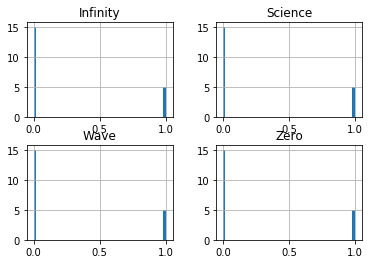

In [17]:
df2 = df.drop(['correct', 'predicted', 'actual'], axis=1)
df2.hist(bins=50)
plt.show()

## RandomForrest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdfModel = rdf.fit(X_train, y_train)
y_pred = rdfModel.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 44 points : 0


In [19]:
from sklearn.metrics import classification_report
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = rdfModel.predict( X_test )
### test your predictions using sklearn.classification_report()
report = classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

          0       1.00      0.80      0.89         5
          1       0.83      1.00      0.91         5
          2       1.00      1.00      1.00         5
          3       1.00      1.00      1.00         5

avg / total       0.96      0.95      0.95        20



In [20]:
y_prediction_proba = rdfModel.predict_proba(X_test)
df = pd.DataFrame(y_prediction_proba, columns = le.classes_)
df['correct']=(y_prediction == y_test)
df['predicted']=le.inverse_transform(y_prediction)
df['actual']=le.inverse_transform(y_test)
df

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Infinity,Science,Wave,Zero,correct,predicted,actual
0,0.1,0.0,0.0,0.9,True,Zero,Zero
1,0.1,0.1,0.8,0.0,True,Wave,Wave
2,0.0,0.8,0.2,0.0,True,Science,Science
3,0.6,0.0,0.3,0.1,True,Infinity,Infinity
4,0.0,0.0,0.0,1.0,True,Zero,Zero
5,0.0,0.0,1.0,0.0,True,Wave,Wave
6,0.0,0.2,0.8,0.0,True,Wave,Wave
7,0.9,0.0,0.1,0.0,True,Infinity,Infinity
8,0.0,0.8,0.2,0.0,True,Science,Science
9,0.0,0.3,0.7,0.0,True,Wave,Wave


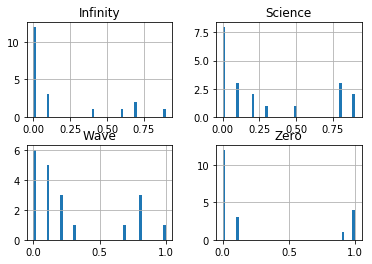

In [21]:
# df[df.columns[1]].hist(bins=50)
df2 = df.drop(['correct', 'predicted', 'actual'], axis=1)
df2.hist(bins=50)
plt.show()

## Save model

In [22]:
from sklearn.externals import joblib
joblib.dump(rdfModel, modelName + '.pkl') 

['demoMotions.pkl']

In [23]:
import pickle
pickle.dump(le, open(modelName + '.le', 'wb'))

# Plotting
Plot all motion data by quaternion.
Allows for a visual comparision of how close the motions are.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

In [25]:
def getMultiMotions(X, qtName, motionName):
    '''qt is the name of the quaternion (e.g. 'quat_w'). motionName is the name of the motion (e.g. 'Curl_90degree'). 
    Should match the names of the indices of df X.
    Returns a df with multiple time-series of the quaternion of the motion type'''
    
    df = X.xs(qtName, level='qt', axis=1)\
        .xs(motionName, level='motion', axis=0)\
        .reset_index()\
        .drop(['dataName'], axis = 1)
    return df

In [26]:
def plotMotion2D(X, motionNames):
    numMotions = len(motionNames)
    fig, axes = plt.subplots(nrows=numMotions, ncols=4, figsize=(20, numMotions*4))
#     fig.suptitle(motionName, fontsize=20)
    for motionIdx in range(0,numMotions):
        motionName = motionNames[motionIdx]
        for qtIdx in range(0,4):
            axes[motionIdx][qtIdx].set_autoscaley_on(False)
            axes[motionIdx][qtIdx].set_ylim([-1,1])
        
        axes[motionIdx][0].set_ylabel(motionName)
        axes[motionIdx][0].set_title('w')
        axes[motionIdx][1].set_title('x')
        axes[motionIdx][2].set_title('y')
        axes[motionIdx][3].set_title('z')
        axes[motionIdx][0].plot(getMultiMotions(X, 'quat_w', motionName).T)
        axes[motionIdx][1].plot(getMultiMotions(X, 'quat_x', motionName).T)
        axes[motionIdx][2].plot(getMultiMotions(X, 'quat_y', motionName).T)
        axes[motionIdx][3].plot(getMultiMotions(X, 'quat_z', motionName).T)
    return fig

In [27]:
motionNames = X.index.levels[0].tolist()
motionNames

['Infinity', 'Science', 'Wave', 'Zero']

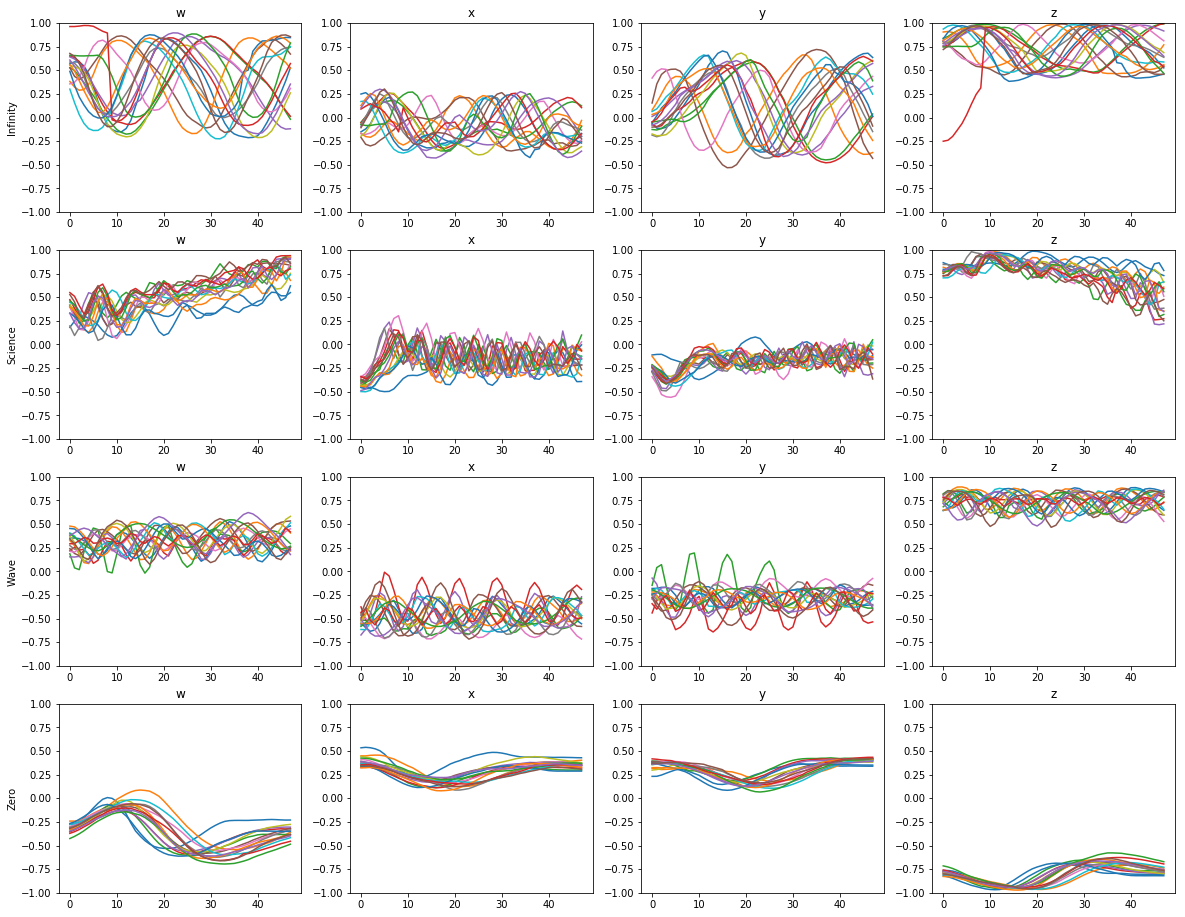

In [71]:
plotMotion2D(X, motionNames)
plt.savefig('Handoid-Motions-'+modelName+'.png')
plt.show()

# Evaluate
Evaluate whole dataset from previously saved model

In [78]:
modelName = 'demoMotions' #previously saved model
evaluateMotions = '20180309_0041'
dataRootDir = os.path.join(rootDir, evaluateMotions) #Uses the same rootDir

Read model using 'joblib'

In [79]:
evalModel = joblib.load(modelName + '.pkl') 

Read back LabelEncoder using 'pickle'

In [80]:
evalLE = pickle.load(open(modelName + '.le', 'rb'))

Read the data

In [81]:
X_eval = read_csv_files(dataRootDir)
Y_eval = X_eval.reset_index()['motion']
X_eval.head()

sample               0                              1                   \
qt               quat_w  quat_x  quat_y  quat_z quat_w  quat_x  quat_y   
motion dataName                                                          
Zero   DATA0     0.8239  0.1439 -0.5385 -0.1028  0.825  0.1399 -0.5374   

sample                       2            ...        45              46  \
qt               quat_z  quat_w  quat_x   ...    quat_y  quat_z  quat_w   
motion dataName                           ...                             
Zero   DATA0    -0.1055  0.8252  0.1378   ...   -0.2674  0.8563 -0.0052   

sample                                      47                          
qt               quat_x  quat_y  quat_z quat_w  quat_x  quat_y  quat_z  
motion dataName                                                         
Zero   DATA0    -0.4373 -0.2669  0.8588 -0.009 -0.4341 -0.2676  0.8601  

[1 rows x 192 columns]

Evaluate the data based on a saved model.

In [82]:
evalLE.classes_

array(['Infinity', 'Science', 'Wave', 'Zero'], dtype=object)

In [83]:
y_prediction = evalModel.predict(X_eval)
y_prediction_proba = evalModel.predict_proba(X_eval)
df = pd.DataFrame(y_prediction_proba, columns = evalLE.classes_)
df['predicted']=evalLE.inverse_transform(y_prediction)
df['actual']=Y_eval
df['correct']=(df['predicted']==df['actual'])
df.head(10)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Infinity,Science,Wave,Zero,predicted,actual,correct
0,0.3,0.2,0.5,0.0,Wave,Zero,False
